In [1]:
from torchvision import datasets
from torchvision.transforms import ToTensor

In [2]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True
)
test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor(),
    download = True
)

In [3]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [48]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [5]:
train_data.targets.size()

torch.Size([60000])

In [6]:
from torch.utils.data import DataLoader

loaders = {

    'train': DataLoader(train_data,
                        batch_size=100,
                        shuffle=True,
                        num_workers=1),
    
    'test': DataLoader(test_data,
                        batch_size=100,
                        shuffle=True,
                        num_workers=1)

}

In [7]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x111288950>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x11124bcb0>}

In [8]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CNN(nn.Module):

    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
    
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        self = self.fc2(x)

        return F.softmax(x)

In [9]:
import torch
print(torch.backends.mps.is_available())

# device = torch.device('mps' if torch.cuda.is_available() else 'cpu')
device = torch.device('cpu')

model = CNN().to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)

loss_fn = nn.CrossEntropyLoss()

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(loaders['train']):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 20 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(loaders["train"].dataset)} ({100. * batch_idx/len(loaders["train"]):.0f}%)]\t{loss.item():.6f}')

def test():
    model.eval()

    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in loaders['test']:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_fn(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(loaders['test'].dataset)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy {correct}/{len(loaders["test"].dataset)} ({100. * correct / len(loaders["test"].dataset):.0f}%\n)')
    

True


In [11]:
import time

device = torch.device('cpu')

model = CNN().to(device)

start_time_cpu = time.time()

for epoch in range(1,6): # 5 epochs
    train(epoch)
    test()

end_time_cpu = time.time() 
total_time_cpu = end_time_cpu - start_time_cpu
#total_time_cpu


/var/folders/8_/qqhcw4rd4m72212dbpl453gh0000gn/T/ipykernel_4406/845714647.py:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch: 1 [0/60000 (0%)]	3.911497
Train Epoch: 1 [2000/60000 (3%)]	3.911552
Train Epoch: 1 [4000/60000 (7%)]	3.911393
Train Epoch: 1 [6000/60000 (10%)]	3.912340
Train Epoch: 1 [8000/60000 (13%)]	3.911303
Train Epoch: 1 [10000/60000 (17%)]	3.910873
Train Epoch: 1 [12000/60000 (20%)]	3.911616
Train Epoch: 1 [14000/60000 (23%)]	3.911078
Train Epoch: 1 [16000/60000 (27%)]	3.911034
Train Epoch: 1 [18000/60000 (30%)]	3.911508
Train Epoch: 1 [20000/60000 (33%)]	3.911606
Train Epoch: 1 [22000/60000 (37%)]	3.911731
Train Epoch: 1 [24000/60000 (40%)]	3.911243
Train Epoch: 1 [26000/60000 (43%)]	3.911501
Train Epoch: 1 [28000/60000 (47%)]	3.911093
Train Epoch: 1 [30000/60000 (50%)]	3.910631
Train Epoch: 1 [32000/60000 (53%)]	3.910978
Train Epoch: 1 [34000/60000 (57%)]	3.911584
Train Epoch: 1 [36000/60000 (60%)]	3.911054
Train Epoch: 1 [38000/60000 (63%)]	3.910630
Train Epoch: 1 [40000/60000 (67%)]	3.911276
Train Epoch: 1 [42000/60000 (70%)]	3.911237
Train Epoch: 1 [44000/60000 (73%)]	3.911505

In [12]:
device = torch.device('mps') #switching device to GPU

model = CNN().to(device)

start_time_gpu = time.time()

for epoch in range(1,6): # 5 epochs
    train(epoch)
    test()

end_time_gpu = time.time() 
total_time_gpu = end_time_gpu - start_time_gpu
#total_time_gpu


/var/folders/8_/qqhcw4rd4m72212dbpl453gh0000gn/T/ipykernel_4406/845714647.py:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch: 1 [0/60000 (0%)]	3.911580
Train Epoch: 1 [2000/60000 (3%)]	3.912125
Train Epoch: 1 [4000/60000 (7%)]	3.912163
Train Epoch: 1 [6000/60000 (10%)]	3.912100
Train Epoch: 1 [8000/60000 (13%)]	3.911898
Train Epoch: 1 [10000/60000 (17%)]	3.912363
Train Epoch: 1 [12000/60000 (20%)]	3.912251
Train Epoch: 1 [14000/60000 (23%)]	3.911770
Train Epoch: 1 [16000/60000 (27%)]	3.911974
Train Epoch: 1 [18000/60000 (30%)]	3.911777
Train Epoch: 1 [20000/60000 (33%)]	3.912202
Train Epoch: 1 [22000/60000 (37%)]	3.912111
Train Epoch: 1 [24000/60000 (40%)]	3.912072
Train Epoch: 1 [26000/60000 (43%)]	3.912187
Train Epoch: 1 [28000/60000 (47%)]	3.912158
Train Epoch: 1 [30000/60000 (50%)]	3.912139
Train Epoch: 1 [32000/60000 (53%)]	3.912007
Train Epoch: 1 [34000/60000 (57%)]	3.911742
Train Epoch: 1 [36000/60000 (60%)]	3.911813
Train Epoch: 1 [38000/60000 (63%)]	3.912134
Train Epoch: 1 [40000/60000 (67%)]	3.912203
Train Epoch: 1 [42000/60000 (70%)]	3.911808
Train Epoch: 1 [44000/60000 (73%)]	3.911544

In [14]:
print('Stats for 5 epochs:')
print(f"Time training for CPU is: {total_time_cpu:.2f} seconds.")
print(f"Time training for GPU is: {total_time_gpu:.2f} seconds.\n")

if total_time_cpu > total_time_gpu:
    print(f"The GPU outpreformed the CPU for: {total_time_cpu-total_time_gpu:.2f} seconds.")
    print(f"The GPU was: {total_time_cpu/total_time_gpu:2f} times faster.")
    print(f"The GPU was: {(total_time_cpu - total_time_gpu) / total_time_cpu * 100:2f} % faster.")
else:
    print(f"The CPU outpreformed the CPU for: {total_time_gpu-total_time_cpu:.2f} seconds. or {total_time_cpu/total_time_gpu*100:2f}%.")
    print(f"The CPU was: {total_time_gpu/total_time_cpu:2f} times faster.")
    print(f"The CPU was: {(total_time_gpu - total_time_cpu) / total_time_gpu * 100:2f} % faster.")

Stats for 5 epochs:
Time training for CPU is: 35.92 seconds.
Time training for GPU is: 24.58 seconds.

The GPU outpreformed the CPU for: 11.34 seconds.
The GPU was: 1.461479 times faster.
The GPU was: 31.576156 % faster.


In [15]:
device = torch.device('cpu')

model = CNN().to(device)

start_time_cpu = time.time()

for epoch in range(1,11): # 10 epochs
    train(epoch)
    test()

end_time_cpu = time.time() 
total_time_cpu = end_time_cpu - start_time_cpu

/var/folders/8_/qqhcw4rd4m72212dbpl453gh0000gn/T/ipykernel_4406/845714647.py:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch: 1 [0/60000 (0%)]	3.911915
Train Epoch: 1 [2000/60000 (3%)]	3.911670
Train Epoch: 1 [4000/60000 (7%)]	3.911726
Train Epoch: 1 [6000/60000 (10%)]	3.911914
Train Epoch: 1 [8000/60000 (13%)]	3.912057
Train Epoch: 1 [10000/60000 (17%)]	3.912007
Train Epoch: 1 [12000/60000 (20%)]	3.911791
Train Epoch: 1 [14000/60000 (23%)]	3.911618
Train Epoch: 1 [16000/60000 (27%)]	3.911742
Train Epoch: 1 [18000/60000 (30%)]	3.911482
Train Epoch: 1 [20000/60000 (33%)]	3.912046
Train Epoch: 1 [22000/60000 (37%)]	3.911815
Train Epoch: 1 [24000/60000 (40%)]	3.912271
Train Epoch: 1 [26000/60000 (43%)]	3.911896
Train Epoch: 1 [28000/60000 (47%)]	3.911825
Train Epoch: 1 [30000/60000 (50%)]	3.911876
Train Epoch: 1 [32000/60000 (53%)]	3.911648
Train Epoch: 1 [34000/60000 (57%)]	3.912371
Train Epoch: 1 [36000/60000 (60%)]	3.911808
Train Epoch: 1 [38000/60000 (63%)]	3.912143
Train Epoch: 1 [40000/60000 (67%)]	3.911657
Train Epoch: 1 [42000/60000 (70%)]	3.912116
Train Epoch: 1 [44000/60000 (73%)]	3.911762

In [16]:
device = torch.device('mps') #switching device to GPU

model = CNN().to(device)

start_time_gpu = time.time()

for epoch in range(1,11): # 10 epochs
    train(epoch)
    test()

end_time_gpu = time.time() 
total_time_gpu = end_time_gpu - start_time_gpu

/var/folders/8_/qqhcw4rd4m72212dbpl453gh0000gn/T/ipykernel_4406/845714647.py:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch: 1 [0/60000 (0%)]	3.910548
Train Epoch: 1 [2000/60000 (3%)]	3.911226
Train Epoch: 1 [4000/60000 (7%)]	3.910515
Train Epoch: 1 [6000/60000 (10%)]	3.911554
Train Epoch: 1 [8000/60000 (13%)]	3.910337
Train Epoch: 1 [10000/60000 (17%)]	3.910543
Train Epoch: 1 [12000/60000 (20%)]	3.911238
Train Epoch: 1 [14000/60000 (23%)]	3.910731
Train Epoch: 1 [16000/60000 (27%)]	3.911232
Train Epoch: 1 [18000/60000 (30%)]	3.911213
Train Epoch: 1 [20000/60000 (33%)]	3.911151
Train Epoch: 1 [22000/60000 (37%)]	3.911659
Train Epoch: 1 [24000/60000 (40%)]	3.910201
Train Epoch: 1 [26000/60000 (43%)]	3.910490
Train Epoch: 1 [28000/60000 (47%)]	3.910324
Train Epoch: 1 [30000/60000 (50%)]	3.910671
Train Epoch: 1 [32000/60000 (53%)]	3.910869
Train Epoch: 1 [34000/60000 (57%)]	3.910084
Train Epoch: 1 [36000/60000 (60%)]	3.910327
Train Epoch: 1 [38000/60000 (63%)]	3.911222
Train Epoch: 1 [40000/60000 (67%)]	3.911064
Train Epoch: 1 [42000/60000 (70%)]	3.911172
Train Epoch: 1 [44000/60000 (73%)]	3.909822

In [17]:
print('Stats for 10 epochs:')
print(f"Time training for CPU is: {total_time_cpu:.2f} seconds.")
print(f"Time training for GPU is: {total_time_gpu:.2f} seconds.\n")

if total_time_cpu > total_time_gpu:
    print(f"The GPU outpreformed the CPU for: {total_time_cpu-total_time_gpu:.2f} seconds.")
    print(f"The GPU was: {total_time_cpu/total_time_gpu:2f} times faster.")
    print(f"The GPU was: {(total_time_cpu - total_time_gpu) / total_time_cpu * 100:2f} % faster.")
else:
    print(f"The CPU outpreformed the CPU for: {total_time_gpu-total_time_cpu:.2f} seconds. or {total_time_cpu/total_time_gpu*100:2f}%.")
    print(f"The CPU was: {total_time_gpu/total_time_cpu:2f} times faster.")
    print(f"The CPU was: {(total_time_gpu - total_time_cpu) / total_time_gpu * 100:2f} % faster.")

Stats for 10 epochs:
Time training for CPU is: 72.02 seconds.
Time training for GPU is: 48.81 seconds.

The GPU outpreformed the CPU for: 23.20 seconds.
The GPU was: 1.475289 times faster.
The GPU was: 32.216648 % faster.


In [19]:
device = torch.device('cpu')

model = CNN().to(device)

start_time_cpu = time.time()

for epoch in range(1,21): # 20 epochs
    train(epoch)
    test()

end_time_cpu = time.time() 
total_time_cpu = end_time_cpu - start_time_cpu

/var/folders/8_/qqhcw4rd4m72212dbpl453gh0000gn/T/ipykernel_4406/845714647.py:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch: 1 [0/60000 (0%)]	3.911915
Train Epoch: 1 [2000/60000 (3%)]	3.911942
Train Epoch: 1 [4000/60000 (7%)]	3.911722
Train Epoch: 1 [6000/60000 (10%)]	3.911933
Train Epoch: 1 [8000/60000 (13%)]	3.911522
Train Epoch: 1 [10000/60000 (17%)]	3.911538
Train Epoch: 1 [12000/60000 (20%)]	3.911951
Train Epoch: 1 [14000/60000 (23%)]	3.911989
Train Epoch: 1 [16000/60000 (27%)]	3.912167
Train Epoch: 1 [18000/60000 (30%)]	3.911932
Train Epoch: 1 [20000/60000 (33%)]	3.912095
Train Epoch: 1 [22000/60000 (37%)]	3.912124
Train Epoch: 1 [24000/60000 (40%)]	3.911871
Train Epoch: 1 [26000/60000 (43%)]	3.911898
Train Epoch: 1 [28000/60000 (47%)]	3.911946
Train Epoch: 1 [30000/60000 (50%)]	3.911666
Train Epoch: 1 [32000/60000 (53%)]	3.912259
Train Epoch: 1 [34000/60000 (57%)]	3.911841
Train Epoch: 1 [36000/60000 (60%)]	3.912183
Train Epoch: 1 [38000/60000 (63%)]	3.912079
Train Epoch: 1 [40000/60000 (67%)]	3.911773
Train Epoch: 1 [42000/60000 (70%)]	3.911807
Train Epoch: 1 [44000/60000 (73%)]	3.912172

In [20]:
device = torch.device('mps') #switching device to GPU

model = CNN().to(device)

start_time_gpu = time.time()

for epoch in range(1,21): # 20 epochs
    train(epoch)
    test()

end_time_gpu = time.time() 
total_time_gpu = end_time_gpu - start_time_gpu

/var/folders/8_/qqhcw4rd4m72212dbpl453gh0000gn/T/ipykernel_4406/845714647.py:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch: 1 [0/60000 (0%)]	3.911688
Train Epoch: 1 [2000/60000 (3%)]	3.911861
Train Epoch: 1 [4000/60000 (7%)]	3.912127
Train Epoch: 1 [6000/60000 (10%)]	3.911773
Train Epoch: 1 [8000/60000 (13%)]	3.911934
Train Epoch: 1 [10000/60000 (17%)]	3.912066
Train Epoch: 1 [12000/60000 (20%)]	3.912116
Train Epoch: 1 [14000/60000 (23%)]	3.911880
Train Epoch: 1 [16000/60000 (27%)]	3.911990
Train Epoch: 1 [18000/60000 (30%)]	3.911608
Train Epoch: 1 [20000/60000 (33%)]	3.912045
Train Epoch: 1 [22000/60000 (37%)]	3.912024
Train Epoch: 1 [24000/60000 (40%)]	3.911883
Train Epoch: 1 [26000/60000 (43%)]	3.911699
Train Epoch: 1 [28000/60000 (47%)]	3.911853
Train Epoch: 1 [30000/60000 (50%)]	3.912186
Train Epoch: 1 [32000/60000 (53%)]	3.911926
Train Epoch: 1 [34000/60000 (57%)]	3.912044
Train Epoch: 1 [36000/60000 (60%)]	3.911639
Train Epoch: 1 [38000/60000 (63%)]	3.912226
Train Epoch: 1 [40000/60000 (67%)]	3.912061
Train Epoch: 1 [42000/60000 (70%)]	3.911959
Train Epoch: 1 [44000/60000 (73%)]	3.911897

In [22]:

print('Stats for 20 epochs:')
print(f"Time training for CPU is: {total_time_cpu:.2f} seconds.")
print(f"Time training for GPU is: {total_time_gpu:.2f} seconds.\n")

if total_time_cpu > total_time_gpu:
    print(f"The GPU outpreformed the CPU for: {total_time_cpu-total_time_gpu:.2f} seconds.")
    print(f"The GPU was: {total_time_cpu/total_time_gpu:2f} times faster.")
    print(f"The GPU was: {(total_time_cpu - total_time_gpu) / total_time_cpu * 100:2f} % faster.")
else:
    print(f"The CPU outpreformed the CPU for: {total_time_gpu-total_time_cpu:.2f} seconds. or {total_time_cpu/total_time_gpu*100:2f}%.")
    print(f"The CPU was: {total_time_gpu/total_time_cpu:2f} times faster.")
    print(f"The CPU was: {(total_time_gpu - total_time_cpu) / total_time_gpu * 100:2f} % faster.")


Stats for 20 epochs:
Time training for CPU is: 144.16 seconds.
Time training for GPU is: 97.26 seconds.

The GPU outpreformed the CPU for: 46.91 seconds.
The GPU was: 1.482299 times faster.
The GPU was: 32.537245 % faster.


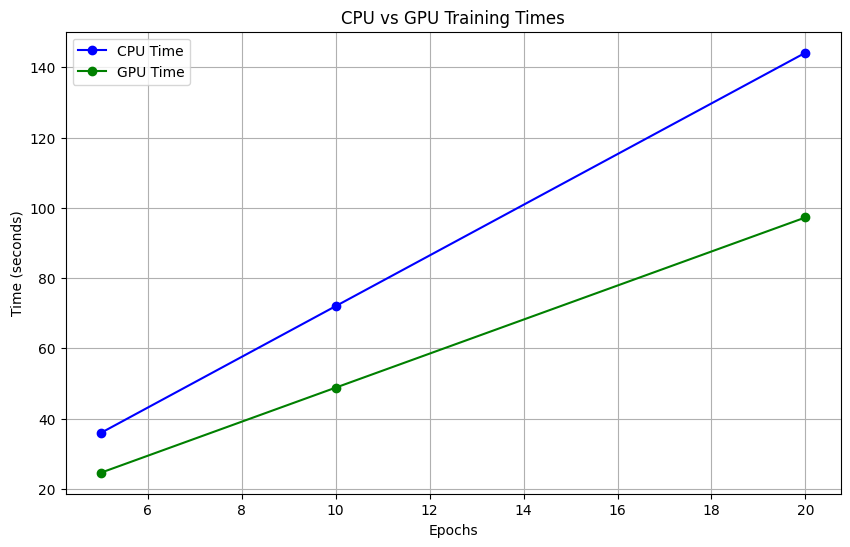

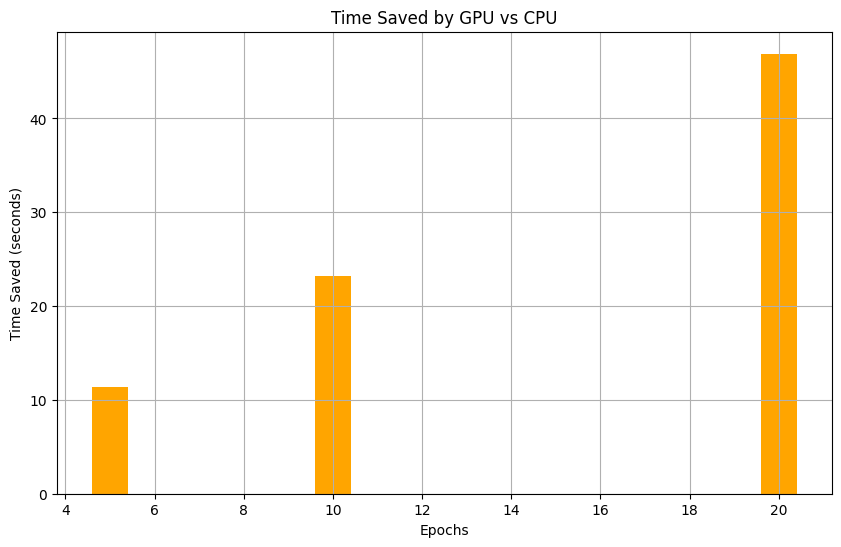

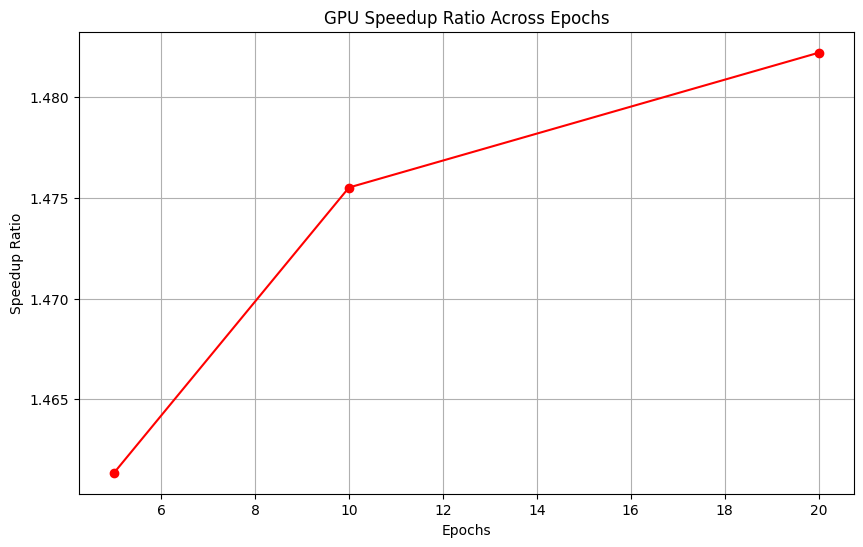

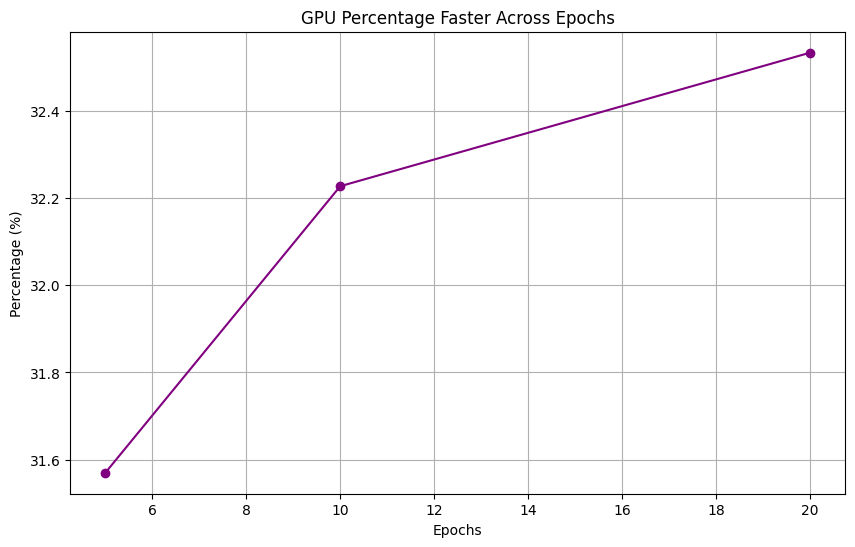

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Data for epochs, CPU and GPU times
epochs = [5, 10, 20]
cpu_times = [35.92, 72.02, 144.16]
gpu_times = [24.58, 48.81, 97.26]

# Calculate derived statistics
time_saved = np.array(cpu_times) - np.array(gpu_times)
speedup_ratio = np.array(cpu_times) / np.array(gpu_times)
percent_faster = (time_saved / np.array(cpu_times)) * 100

# Plot 1: Training Times
plt.figure(figsize=(10, 6))
plt.plot(epochs, cpu_times, label='CPU Time', marker='o', color='blue')
plt.plot(epochs, gpu_times, label='GPU Time', marker='o', color='green')
plt.xlabel('Epochs')
plt.ylabel('Time (seconds)')
plt.title('CPU vs GPU Training Times')
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Time Saved by GPU
plt.figure(figsize=(10, 6))
plt.bar(epochs, time_saved, color='orange')
plt.xlabel('Epochs')
plt.ylabel('Time Saved (seconds)')
plt.title('Time Saved by GPU vs CPU')
plt.grid(True)
plt.show()

# Plot 3: GPU Speedup Ratio
plt.figure(figsize=(10, 6))
plt.plot(epochs, speedup_ratio, label='GPU Speedup Ratio', marker='o', color='red')
plt.xlabel('Epochs')
plt.ylabel('Speedup Ratio')
plt.title('GPU Speedup Ratio Across Epochs')
plt.grid(True)
plt.show()

# Plot 4: GPU Percentage Faster
plt.figure(figsize=(10, 6))
plt.plot(epochs, percent_faster, label='GPU % Faster', marker='o', color='purple')
plt.xlabel('Epochs')
plt.ylabel('Percentage (%)')
plt.title('GPU Percentage Faster Across Epochs')
plt.grid(True)
plt.show()


In [24]:
#test